In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('df_post_clustering.csv')

In [3]:
df.head(4)

,zipcode,cluster_label,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,92131,1,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",...,9.850000,9.750000,9.750000,9.775000,0,1,0,strict_14_with_grace_period,0,0
1,92037,3,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",...,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0
2,92109,1,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",...,9.853496,9.834812,9.875694,9.457778,0,1,0,flexible,0,0
3,92120,1,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",...,9.867347,9.848485,9.765306,9.673469,0,0,0,flexible,0,0


## Encoding the data

In [4]:
columns_to_encode = [
    'zipcode', 
    'property_type', 
    'room_type',
    'bed_type', 
    'cancellation_policy'  
]

df_encoded = pd.get_dummies(
    df, 
    columns=columns_to_encode, 
    prefix=columns_to_encode, 
    drop_first=True,
    dtype=int
)

df_encoded.head(4)

,cluster_label,accommodates,bathrooms,bedrooms,beds,amenities,nightly_price,price_per_stay,security_deposit,cleaning_fee,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_luxury_moderate,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1,1,1.0,1.0,1.0,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,1000.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
1,3,1,2.0,2.0,3.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,722.168919,219.822930,...,0,0,0,1,0,0,0,1,0,0
2,1,1,1.0,1.0,1.0,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,372.402174,123.162459,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1.0,1.0,1.0,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",1150.0,1150.0,227.731959,58.066038,...,0,0,0,1,0,0,0,0,0,0


In [5]:

df_encoded['amenities'] = df_encoded['amenities'].str.replace('[{}"\']', '', regex=True)

amenity_dummies = df_encoded['amenities'].str.get_dummies(sep=',')

df_encoded = df_encoded.drop('amenities', axis=1)

df_encoded = pd.concat([df_encoded, amenity_dummies], axis=1)

In [6]:
df_encoded.head(4)

,cluster_label,accommodates,bathrooms,bedrooms,beds,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,1,1,1.0,1.0,1.0,1100.0,1100.0,1000.000000,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
1,3,1,2.0,2.0,3.0,1400.0,1400.0,722.168919,219.822930,1,...,0,0,0,0,0,1,0,0,1,1
2,1,1,1.0,1.0,1.0,1250.0,1250.0,372.402174,123.162459,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1.0,1.0,1.0,1150.0,1150.0,227.731959,58.066038,1,...,0,0,0,0,0,1,0,0,0,0


## Analysing the data

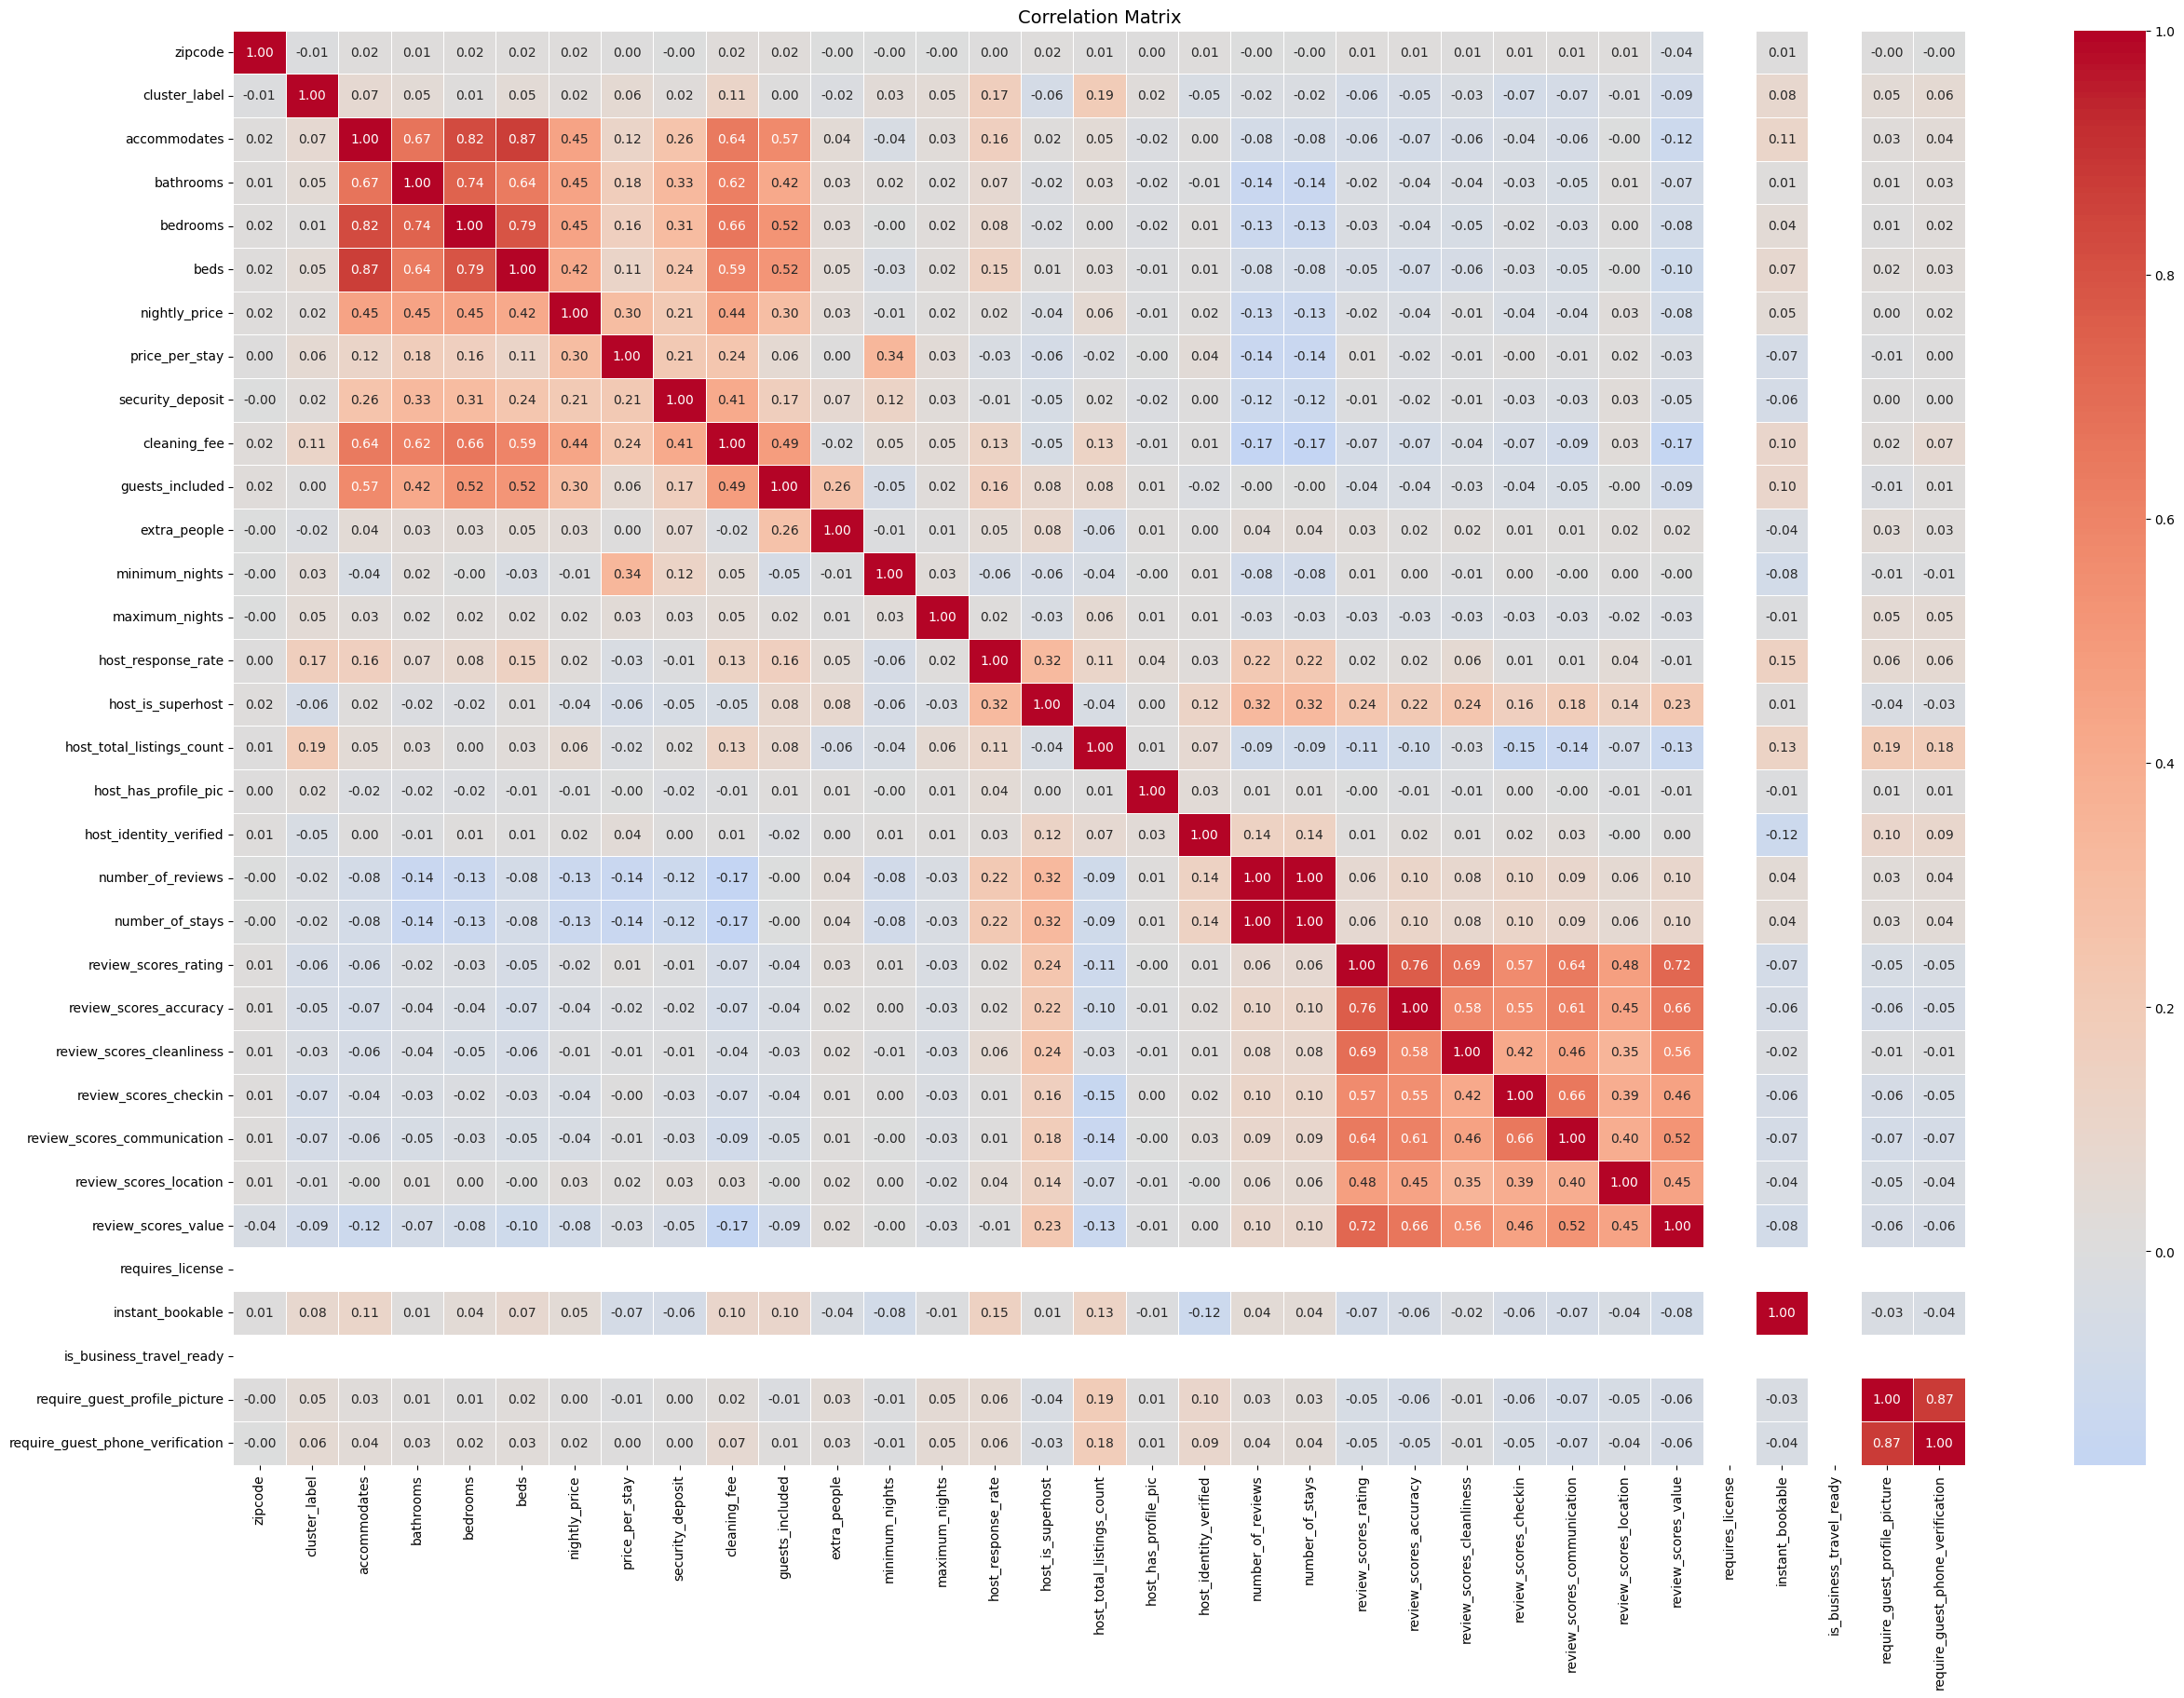

In [9]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(30, 20))
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",          
    cmap='coolwarm',    
    center=0,           
    linewidths=0.5
)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [10]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df_reduced = df.drop(columns=to_drop)

In [11]:
df_reduced.head(4)

,zipcode,cluster_label,property_type,room_type,accommodates,bathrooms,bed_type,amenities,nightly_price,price_per_stay,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture
0,92131,1,House,Private room,1,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,...,9.700000,9.850000,9.750000,9.750000,9.775000,0,1,0,strict_14_with_grace_period,0
1,92037,3,Apartment,Entire home/apt,1,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0
2,92109,1,Townhouse,Private room,1,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,...,9.493348,9.853496,9.834812,9.875694,9.457778,0,1,0,flexible,0
3,92120,1,Apartment,Entire home/apt,1,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",1150.0,1150.0,...,9.545455,9.867347,9.848485,9.765306,9.673469,0,0,0,flexible,0
